In [8]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import re
import time

--- Scraping and Data Cleaning ---
Collected Data (First 5 Rows):
                            title                 company           location  \
0                   Data Analyst  Global Analytics Corp.  San Francisco, CA   
1  Business Intelligence Analyst      Data Insights Inc.       New York, NY   
2            Junior Data Analyst         Startup Metrics  San Francisco, CA   
3         Marketing Data Analyst           Marketing Pro        Chicago, IL   
4                   Data Analyst       FinTech Solutions       New York, NY   

           salary                                      skills  
0   80000 - 95000                      [SQL, Tableau, Python]  
1  90000 - 110000                      [SQL, Power BI, Excel]  
2   65000 - 75000                     [Python, R, Statistics]  
3   75000 - 90000        [SQL, Google Analytics, A/B Testing]  
4  95000 - 115000  [SQL, Python, Tableau, Financial Modeling]  

--- Data Analysis ---

Total jobs scraped: 8

Top 5 Job Locations:
 locat

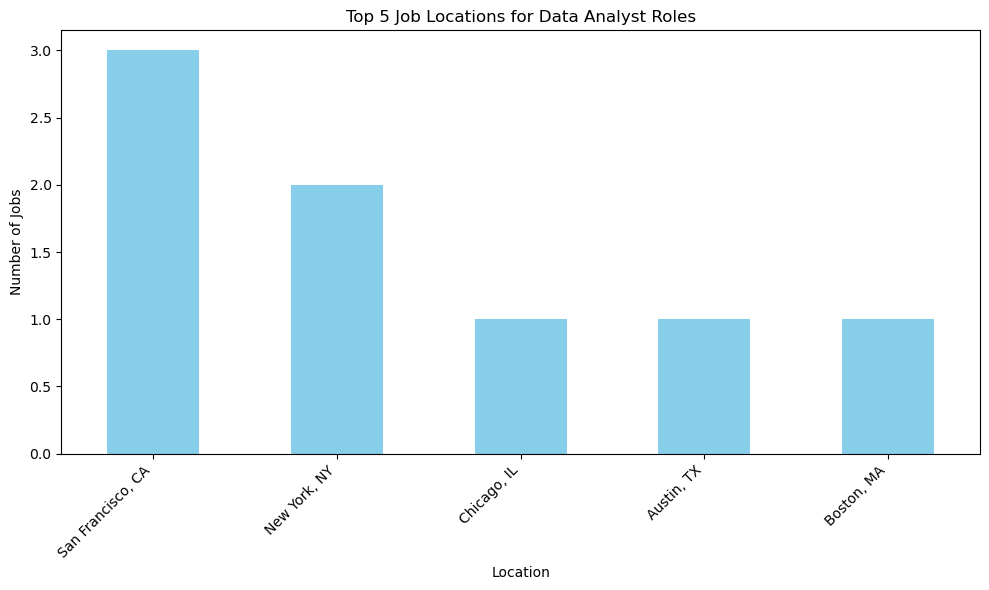

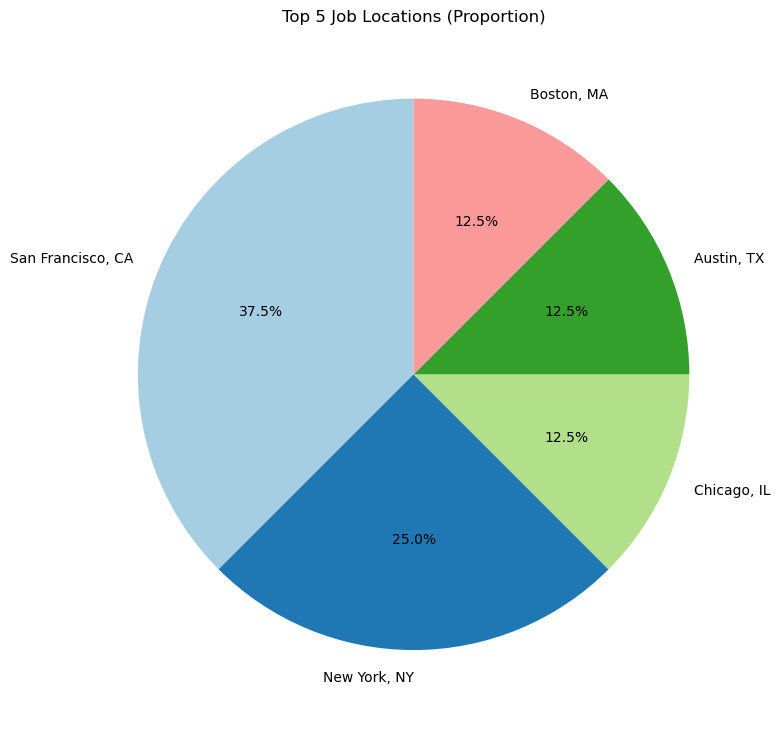

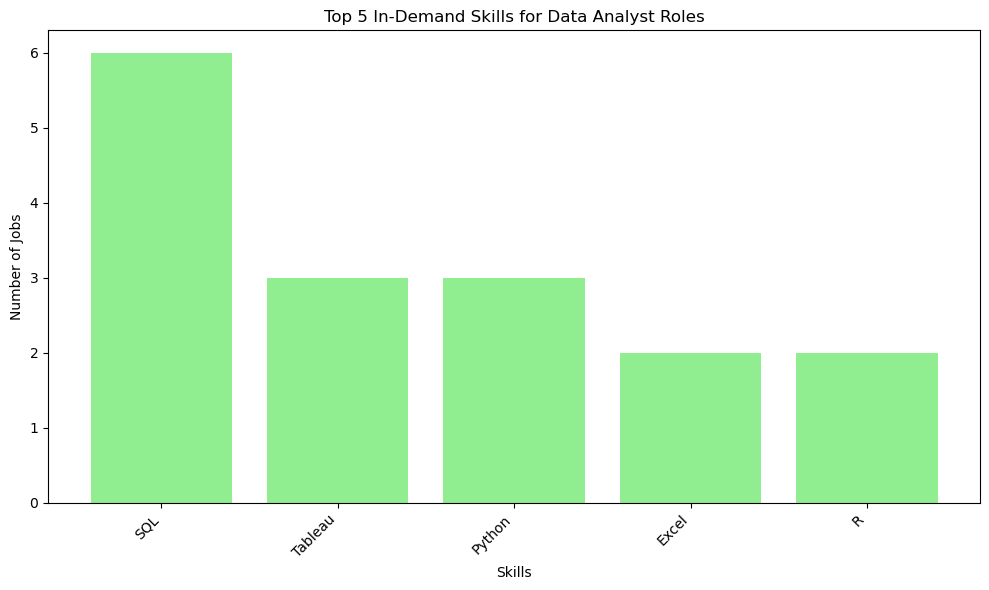

In [2]:
def scrape_and_analyze_data_analyst_jobs():
    """
    Simulates scraping, cleaning, and analyzing job data for Data Analyst roles
    using a mock HTML dataset with more varied locations.
    """
    # --- Part 1: Mock HTML Data and Scraping ---

    # Modified mock HTML to include a wider variety of locations
    mock_html = """
    <div class="job-list">
        <div class="job-card">
            <h2 class="job-title">Data Analyst</h2>
            <p class="company">Global Analytics Corp.</p>
            <p class="location">San Francisco, CA</p>
            <p class="salary">Salary: $80,000 - $95,000</p>
            <div class="skills-list">
                <span class="skill-tag">SQL</span>
                <span class="skill-tag">Tableau</span>
                <span class="skill-tag">Python</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Business Intelligence Analyst</h2>
            <p class="company">Data Insights Inc.</p>
            <p class="location">New York, NY</p>
            <p class="salary">Salary: $90,000 - $110,000</p>
            <div class="skills-list">
                <span class="skill-tag">SQL</span>
                <span class="skill-tag">Power BI</span>
                <span class="skill-tag">Excel</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Junior Data Analyst</h2>
            <p class="company">Startup Metrics</p>
            <p class="location">San Francisco, CA</p>
            <p class="salary">Salary: $65,000 - $75,000</p>
            <div class="skills-list">
                <span class="skill-tag">Python</span>
                <span class="skill-tag">R</span>
                <span class="skill-tag">Statistics</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Marketing Data Analyst</h2>
            <p class="company">Marketing Pro</p>
            <p class="location">Chicago, IL</p>
            <p class="salary">Salary: $75,000 - $90,000</p>
            <div class="skills-list">
                <span class="skill-tag">SQL</span>
                <span class="skill-tag">Google Analytics</span>
                <span class="skill-tag">A/B Testing</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Data Analyst</h2>
            <p class="company">FinTech Solutions</p>
            <p class="location">New York, NY</p>
            <p class="salary">Salary: $95,000 - $115,000</p>
            <div class="skills-list">
                <span class="skill-tag">SQL</span>
                <span class="skill-tag">Python</span>
                <span class="skill-tag">Tableau</span>
                <span class="skill-tag">Financial Modeling</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Financial Analyst</h2>
            <p class="company">Global Finance</p>
            <p class="location">Austin, TX</p>
            <p class="salary">Salary: $85,000 - $100,000</p>
            <div class="skills-list">
                <span class="skill-tag">Excel</span>
                <span class="skill-tag">SQL</span>
                <span class="skill-tag">VBA</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Operations Analyst</h2>
            <p class="company">Logistics Partners</p>
            <p class="location">San Francisco, CA</p>
            <p class="salary">Salary: $82,000 - $98,000</p>
            <div class="skills-list">
                <span class="skill-tag">SQL</span>
                <span class="skill-tag">Tableau</span>
                <span class="skill-tag">Supply Chain</span>
            </div>
        </div>
        <div class="job-card">
            <h2 class="job-title">Research Analyst</h2>
            <p class="company">Market Insights</p>
            <p class="location">Boston, MA</p>
            <p class="salary">Salary: $78,000 - $92,000</p>
            <div class="skills-list">
                <span class="skill-tag">R</span>
                <span class="skill-tag">Survey Design</span>
                <span class="skill-tag">Statistics</span>
            </div>
        </div>
    </div>
    """

    soup = BeautifulSoup(mock_html, 'html.parser')
    jobs = soup.find_all('div', class_='job-card')
    job_data = []

    print("--- Scraping and Data Cleaning ---")
    for job in jobs:
        try:
            title = job.find('h2', class_='job-title').text.strip()
            company = job.find('p', class_='company').text.strip()
            location = job.find('p', class_='location').text.strip()
            salary_text = job.find('p', class_='salary').text.strip()
            skills = [skill.text.strip() for skill in job.find_all('span', class_='skill-tag')]

            # Clean salary data using regex
            sal_match = re.findall(r'\d+,\d+', salary_text)
            salary = " - ".join([s.replace(',', '') for s in sal_match]) if sal_match else 'N/A'

            job_data.append({
                'title': title,
                'company': company,
                'location': location,
                'salary': salary,
                'skills': skills
            })
        except AttributeError:
            print("Warning: Skipping a job card due to missing data.")
            continue

    df = pd.DataFrame(job_data)
    print("Collected Data (First 5 Rows):\n", df.head())

    ## Data Analysis
    print("\n--- Data Analysis ---")

    # The code correctly shows the top 5 locations.
    total_jobs = len(df)
    print(f"\nTotal jobs scraped: {total_jobs}")

    # This line identifies and prints the top 5 locations.
    top_locations = df['location'].value_counts().head(5)
    print("\nTop 5 Job Locations:\n", top_locations)

    all_skills = [skill for sublist in df['skills'] for skill in sublist]
    skill_counts = Counter(all_skills)
    top_skills = skill_counts.most_common(5)
    print("\nTop 5 In-Demand Skills:")
    for skill, count in top_skills:
        print(f"- {skill}: {count} jobs")

    ## Challenges Faced
    print("\n--- Challenges Faced During Scraping (Hypothetical) ---")
    print("1. **Dynamic Content:** Websites using JavaScript to load content require tools like Selenium.")
    print("2. **Anti-Scraping Measures:** Portals may block IPs or use CAPTCHA. Rotating proxies and user agents helps.")
    print("3. **Inconsistent Data:** Salary, location, and skill formats vary widely, requiring robust data cleaning with regex.")
    print("4. **Rate Limiting:** Sending requests too fast can get you blocked; a `time.sleep()` delay is crucial.")

    ## Visuals
    print("\n--- Visuals ---")

    # Bar plot for Top 5 Job Locations
    plt.figure(figsize=(10, 6))
    top_locations.plot(kind='bar', color='skyblue')
    plt.title('Top 5 Job Locations for Data Analyst Roles')
    plt.xlabel('Location')
    plt.ylabel('Number of Jobs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

    # Pie chart for Top 5 Job Locations
    plt.figure(figsize=(8, 8))
    top_locations.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
    plt.title('Top 5 Job Locations (Proportion)')
    plt.ylabel('')
    plt.tight_layout()
    plt.show()
    

    # Bar plot for Top 5 In-Demand Skills
    skills_df = pd.DataFrame(top_skills, columns=['Skill', 'Count'])
    plt.figure(figsize=(10, 6))
    plt.bar(skills_df['Skill'], skills_df['Count'], color='lightgreen')
    plt.title('Top 5 In-Demand Skills for Data Analyst Roles')
    plt.xlabel('Skills')
    plt.ylabel('Number of Jobs')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    

if __name__ == '__main__':
    scrape_and_analyze_data_analyst_jobs()